# One-class SVM
### Credit Card Fraud Detection

 #### A One-Class Support Vector Machine is an unsupervised learning algorithm that is trained only on the ‘normal’ data, It learns the boundaries of these points and is therefore able to classify any points that lie outside the boundary as outliers.

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
df=pd.read_csv("creditcard.csv")

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [28]:
#Renaming the class labels as labels
df=df.rename(columns={'Class':'Label'})

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


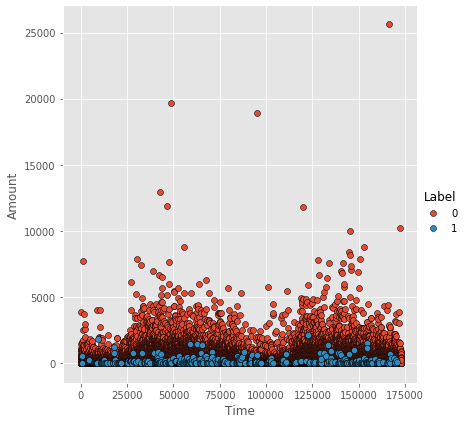

In [30]:
#visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
sns.FacetGrid(df, hue="Label", size = 6).map(plt.scatter, "Time", "Amount", edgecolor="k").add_legend()
plt.show()

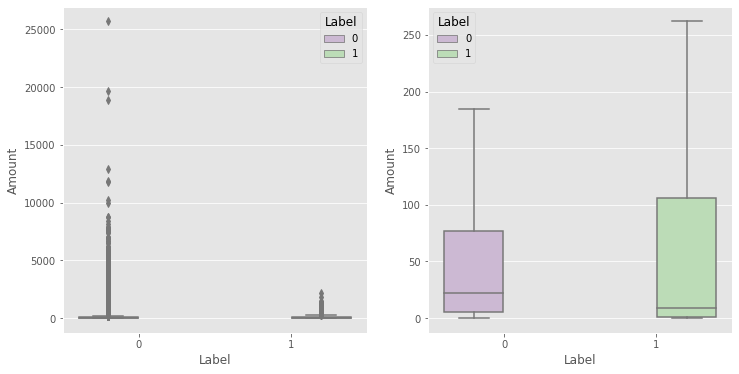

In [33]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,6))
s=sns.boxplot(ax=ax1,x="Label",y="Amount",hue="Label",data=df,palette="PRGn",showfliers=True)
s=sns.boxplot(ax=ax2,x="Label",y="Amount",hue="Label",data=df,palette="PRGn",showfliers=False)
plt.show()

In [4]:
normal=df.loc[df.Label==0]
anamalous=df.loc[df.Label==1]

In [10]:
#In one class SVM, The model is trained with only one class,here model is trained only with observations of normal transactions only.
#remaing will be considered in test set

train_df=normal.loc[0:200000,:]
train_df=train_df.drop('Label',1)
y1=normal.loc[200000:,'Label'] #labels with normal transaction
y2=anamalous['Label']

In [13]:
x_test1=normal.loc[200000:,:].drop('Label',1)
x_test2=anamalous.drop('Label',1)
x_test=x_test1.append(x_test2) #test set of features

In [14]:
oneclass = svm.OneClassSVM(kernel='linear', gamma=0.001, nu=0.95)

In [15]:
y_test1=normal.loc[200000:,'Label']
y_test2=anamalous['Label']

y_test=y_test1.append(y_test2)

In [17]:
oneclass.fit(train_df)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='linear',
            max_iter=-1, nu=0.95, shrinking=True, tol=0.001, verbose=False)

In [18]:
fraud_prediction=oneclass.predict(x_test)

In [19]:
#number of outliers predicted by the model
unique,counts=np.unique(fraud_prediction,return_counts=True)
print(np.asarray((unique, counts)).T)

[[   -1   371]
 [    1 84821]]


In [20]:
y_test=y_test.to_frame()
y_test=y_test.reset_index()
fraud_prediction=pd.DataFrame(fraud_prediction)
fraud_prediction=fraud_prediction.rename(columns={0:'prediction'})

In [23]:
#TP: True Positive
#TN: True Negative
#FP: False Positve
#FN: False Negative

TP=FP=TN=FN=0

for i in range(len(y_test)):
    if y_test['Label'][i]== 0 and fraud_prediction['prediction'][i] == 1:
        TP = TP+1
    elif y_test['Label'][i]== 0 and fraud_prediction['prediction'][i] == -1:
        FN = FN+1
    elif y_test['Label'][i]== 1 and fraud_prediction['prediction'][i] == 1:
        FP = FP+1
    else:
        TN = TN +1
        
print (TP,FN,FP,TN)
    

84700 0 121 371


In [40]:
accuracy=(TP+TN)/(TP+FN+FP+TN)
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)

print("Accuracy   : ",accuracy)
print("Sensitivity: ",sensitivity)
print("Specificity: ",specificity)

Accuracy   :  0.9985796788430839
Sensitivity:  1.0
Specificity:  0.7540650406504065
